In [483]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import warnings


warnings.filterwarnings('ignore')


data = None
with open('Москва_2021.txt') as file:
    data = [int(line.rstrip()) for line in file]


In [484]:
def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_avg(data: list):
    return sum(data) / len(data)


def count_avg(data: list):
    return sum(data) / len(data)

def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_var_coef(data):
    return count_sko(data) / count_mathematical_expectation(data)

def count_moda(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    max_val = max(num_of_occurrences, key=num_of_occurrences.get)
    max_val_freq = num_of_occurrences[max_val] / len(data)

    return [max_val, num_of_occurrences[max_val], len(data)]

def count_razmax(data):
    return max(data) - min(data)

def find_second_max_and_min(data):

    sorted_data = sorted(set(data))
    
    return sorted_data[1], sorted_data[-2]

def find_k_momentum(data: list, k: int):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    mat_exp = count_mathematical_expectation(data)

    momentum = 0

    for val in num_of_occurrences:
        momentum += (val - mat_exp) ** k * (num_of_occurrences[val] / len(data))
    
    return momentum

def count_asymmetry(data):
    return find_k_momentum(data, 3) / (count_sko(data) ** 3)

def count_excess(data):
    return find_k_momentum(data, 4) / (count_sko(data) ** 4) - 3


def count_median(data):
    if len(data) % 2 == 1:
        m = (len(data)-1) // 2
        return sorted(data)[m+1]
    else:
        m = len(data) // 2
        return (sorted(data)[m] + sorted(data)[m+1])/2


def count_frequencies(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    return num_of_occurrences

1. Используя дискретный ряд распределения, полученный в
лабораторной работе № 1, вычислить коэффициент линейной корреляции
между возрастом преступника и частотой совершаемых преступлений.

In [485]:
# дискретный ряд распределения, полученный в
# лабораторной работе № 1


num_of_occurrences = {}

for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

for val in num_of_occurrences:
    print(val, " : ", num_of_occurrences[val])

23  :  1071
32  :  796
27  :  1263
26  :  980
44  :  1032
49  :  1060
63  :  183
34  :  869
66  :  188
38  :  1006
28  :  1113
35  :  676
46  :  677
62  :  139
22  :  944
31  :  1115
37  :  522
18  :  806
29  :  1340
30  :  734
20  :  910
69  :  202
36  :  1198
25  :  1050
48  :  1026
40  :  723
21  :  716
45  :  690
41  :  837
24  :  810
19  :  971
67  :  128
42  :  978
33  :  758
57  :  136
47  :  831
43  :  820
55  :  62
51  :  188
39  :  695
52  :  193
56  :  76
60  :  266
64  :  189
61  :  226
16  :  236
15  :  53
58  :  262
50  :  150
53  :  47
65  :  79
59  :  74
71  :  85
14  :  49
17  :  126
70  :  26
73  :  17
54  :  26


In [486]:
df = pd.DataFrame( columns=['Age', 'n_crimes'])
df.Age = num_of_occurrences.keys()
df.n_crimes = num_of_occurrences.values()
df = df.sort_values(by='Age')
df

,Age,n_crimes
53,14,49
46,15,53
45,16,236
54,17,126
17,18,806
30,19,971
20,20,910
26,21,716
14,22,944
0,23,1071


In [487]:
df.corr('pearson')

,Age,n_crimes
Age,1.000000,-0.577689
n_crimes,-0.577689,1.000000


In [488]:
def count_pirson(num_of_occurrences: dict):
    ages = list(num_of_occurrences.keys())
    n_crimes = list(num_of_occurrences.values())

    avg_age = count_avg(ages)
    avg_n_crimes = count_avg(n_crimes)


    sum_numerator = 0
    sum_denominator_left = 0
    sum_denominator_right = 0


    for id in range(len(ages)):
        sum_numerator += (ages[id] - avg_age) * (n_crimes[id] - avg_n_crimes)
        sum_denominator_left += (ages[id] - avg_age) ** 2
        sum_denominator_right += (n_crimes[id] - avg_n_crimes) ** 2

    return sum_numerator / ( sum_denominator_left ** 0.5 * sum_denominator_right ** 0.5 )

In [489]:
print(count_pirson(num_of_occurrences))

-0.5776885005968904


3. Для указанного вида зависимости построить корреляционное поле

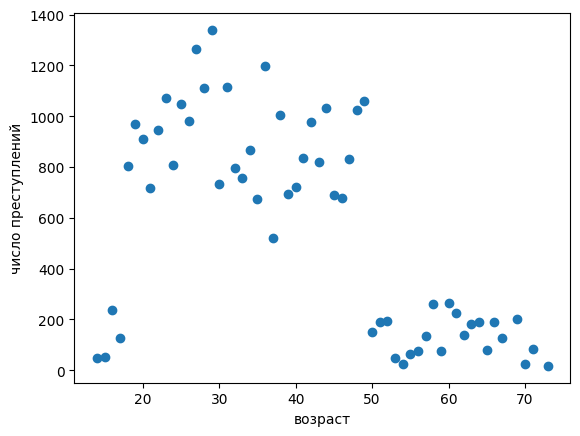

In [490]:
plt.xlabel('возраст')
plt.ylabel('число преступлений')
plt.plot(list(num_of_occurrences.keys()), num_of_occurrences.values(), 'o')

4. Исследовать совокупность данных на наличие нелинейной
корреляционной зависимости.

In [491]:

def divide_to_same_intervals(data: list, n_parts: int): 
    data = sorted(data)
    
    
    curr_interval_size = 1
    
    interval_is_ok = True
    
    prev_begin_id = 0
    while interval_is_ok:        
        curr_n_parts = 0
        begin_id = 0
        end_id = 1

        # all_intervals = []
        while end_id < len(data) and curr_n_parts <= n_parts:
            while end_id < len(data) and data[end_id] - data[begin_id] <= curr_interval_size:
                end_id += 1

            # print(curr_n_parts,data[begin_id-1], data[begin_id], '|',data[end_id-1],data[end_id], data[end_id+1])
            # all_intervals.append(data[begin_id:end_id])
            if end_id-1 < len(data) and data[end_id-1] - data[begin_id] != curr_interval_size:
                interval_is_ok = False
                break

            
            prev_begin_id = begin_id
            begin_id = end_id
            curr_n_parts += 1

        if not interval_is_ok:
            break

        elif end_id >= len(data) and curr_n_parts <= n_parts:
            if data[len(data) - 1] - data[prev_begin_id] == curr_interval_size:
                curr_interval_size += 1
        
            interval_is_ok = False
        

        else:
            curr_interval_size += 1


    final_interval_size = curr_interval_size - 1
    
    curr_n_parts = 0
    begin_id = 0
    end_id = 1
    all_intervals = []

    while end_id < len(data) and curr_n_parts < n_parts:
        while end_id < len(data) and data[end_id] - data[begin_id] <= final_interval_size:
            end_id += 1

        all_intervals.append(data[begin_id:end_id])
        begin_id = end_id 
        curr_n_parts += 1

    return all_intervals, final_interval_size


In [492]:
# разобьем данные на группы




all_samples, h = divide_to_same_intervals(data, 7)

df = pd.DataFrame( columns=['age_group', 'n_crimes', 'group_avg'])

age_groups = []
n_crimes = []
group_avgs = []

for group in all_samples:
    age_groups.append(str(min(group)) + ' - ' + str(max(group)))
    n_crimes.append(len(group))
    group_avgs.append(count_avg(group))

df.age_group = age_groups
df.n_crimes = n_crimes
df.group_avg = group_avgs

df

,age_group,n_crimes,group_avg
0,14 - 20,3151,18.583307
1,21 - 27,6834,24.247586
2,28 - 34,6725,30.727286
3,35 - 41,5657,37.948029
4,42 - 48,6054,44.968781
5,49 - 55,1726,50.039977
6,56 - 62,1179,59.316370


In [493]:
# Нелинейная корреляционная зависимость


global_avg = count_avg(data)
global_size = len(data)

d_mezgrup_sum = 0

for group in all_samples:
    group_avg = count_avg(group)
    group_size = len(group)

    d_mezgrup_sum += (group_avg - global_avg) ** 2 * group_size

d_mezgrup = d_mezgrup_sum / global_size


d_obsh_sum = 0

for group in all_samples:
    for val in group:
        d_obsh_sum += (val - global_avg) ** 2

d_obsh = d_obsh_sum / global_size


nu = ( d_mezgrup / d_obsh ) ** 0.5
print('корреляционное отношение = ', nu)

корреляционное отношение =  0.983738346220248


In [494]:
# Коэффициент ранговой корреляции Спирмена

df = pd.DataFrame( columns=['Age', 'n_crimes','r1', 'r2', 'd', 'd^2'])
df.Age = num_of_occurrences.keys()
df.n_crimes = num_of_occurrences.values()

df

,Age,n_crimes,r1,r2,d,d^2
0,23,1071,NaN,NaN,NaN,NaN
1,32,796,NaN,NaN,NaN,NaN
2,27,1263,NaN,NaN,NaN,NaN
3,26,980,NaN,NaN,NaN,NaN
4,44,1032,NaN,NaN,NaN,NaN
5,49,1060,NaN,NaN,NaN,NaN
6,63,183,NaN,NaN,NaN,NaN
7,34,869,NaN,NaN,NaN,NaN
8,66,188,NaN,NaN,NaN,NaN
9,38,1006,NaN,NaN,NaN,NaN


In [495]:

df_sorted = pd.DataFrame( columns=['Age', 'n_crimes'])
df_sorted.Age = sorted(list(num_of_occurrences.keys()))[::-1]
df_sorted.n_crimes = sorted(list(num_of_occurrences.values()))[::-1]

df_sorted["rank"] = range(1,len(df)+1)
df_sorted

,Age,n_crimes,rank
0,73,1340,1
1,71,1263,2
2,70,1198,3
3,69,1115,4
4,67,1113,5
5,66,1071,6
6,65,1060,7
7,64,1050,8
8,63,1032,9
9,62,1026,10


In [496]:
r1 = []
r2 = []
d = []
d2 = []

for age in df["Age"]:
    row = df_sorted.loc[df_sorted['Age'] == age]
    r1.append(row['rank'].values[0])


for n_crime in df["n_crimes"]:
    row = df_sorted.loc[df_sorted['n_crimes'] == n_crime]
    r2.append(row['rank'].values[0])

for id in range(len(r1)):
    d.append(abs(r1[id] - r2[id]))
    d2.append((r1[id] - r2[id])**2)

df.r1 = r1
df.r2 = r2
df.d = d
df['d^2'] = d2

df

,Age,n_crimes,r1,r2,d,d^2
0,23,1071,49,6,43,1849
1,32,796,40,23,17,289
2,27,1263,45,2,43,1849
3,26,980,46,12,34,1156
4,44,1032,28,9,19,361
5,49,1060,23,7,16,256
6,63,183,9,42,33,1089
7,34,869,38,17,21,441
8,66,188,6,40,34,1156
9,38,1006,34,11,23,529


In [497]:
r = 1 - 6 * sum(d2) / ( len(d2) * (len(d2)**2-1) )
print(r)

-0.5208096219508445
